In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions import complete
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.83.1.


In [2]:
prompt = """"Write a python function named runme_001 
that inputs an image as a numpy array
and uses opencv vector functions
to return a darker version of the input image
without running a for loop on the pixels.
import all modules that are used in the code.
"""

In [3]:
success, metadata = complete(prompt,max_tokens=2000)
assert success

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=4249 request_id=2924186082ebbb945ce8d723d47c207b response_code=200
response: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\ndef runme_001 (image): \n    import cv2\n    import numpy as np\n    \n    # darken the input image\n    dark_image = cv2.addWeighted(image,0.8,np.zeros(image.shape,image.dtype),0,20)\n    \n    # return the result\n    return dark_image"
    }
  ],
  "created": 1687231717,
  "id": "cmpl-7TMKjawaa9atuWSlIEjuqzXwgfjl8",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 85,
    "prompt_tokens": 60,
    "total_tokens": 145
  }
}
openai-cli.complete(): finish_reason: stop.


In [4]:
code = metadata["response"]["choices"][0]["text"]
logger.info("code: {}".format(code))
exec(code)

In [5]:
input_image = file.load_image(os.path.join(os.getenv("HOME",""),"git/blue-bracket/images/portal-34.jpg"))[1]

In [6]:
image_output = runme_001(input_image)
assert image_output.__class__.__name__ == "ndarray"

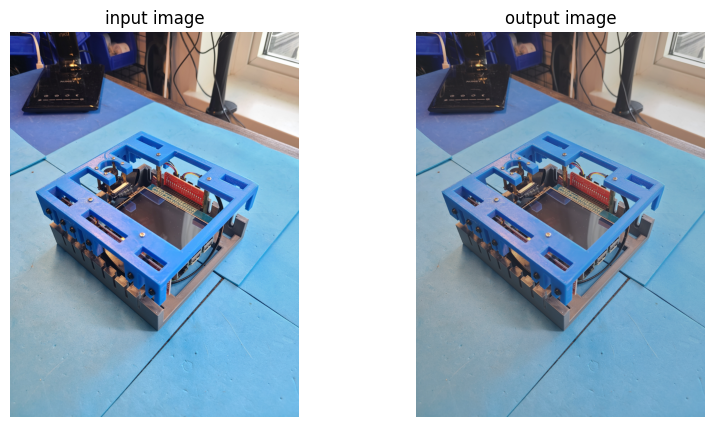

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [8]:
# END